In [48]:
import warnings
import numpy as np
import pandas as pd
import yfinance as yf
import plotly.offline as py
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
#from prophet import Prophet
#from xgboost import XGBRegressor
#from sklearn.preprocessing import RobustScaler
#from sklearn.linear_model import Ridge, Lasso
#from sklearn.ensemble import GradientBoostingRegressor
#from utilities.evaluation import RegressionEvaluator
#from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
#from utilities.time_series import create_lags_features, create_date_features

#py.init_notebook_mode()
pd.options.plotting.backend = "plotly"
warnings.filterwarnings(action="ignore")
pd.set_option("float_format", "{:.2f}".format)

### Analisis exploratorio de datos

In [36]:
data = pd.read_csv('data/trm.csv', sep=',')
data['date'] = pd.to_datetime(data['date'])

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2192 non-null   datetime64[ns]
 1   close   2192 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.4 KB


In [38]:
data.head().append(data.tail())

,date,close
0,2016-01-01,3137.30
1,2016-01-02,3143.13
2,2016-01-03,3148.97
3,2016-01-04,3154.80
4,2016-01-05,3173.90
2187,2021-12-27,3989.75
2188,2021-12-28,3995.08
2189,2021-12-29,4007.42
2190,2021-12-30,4036.12
2191,2021-12-31,4068.25


In [39]:
data['day_of_week'] = data['date'].dt.dayofweek
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

### Violin Plot by Year, day of week and month

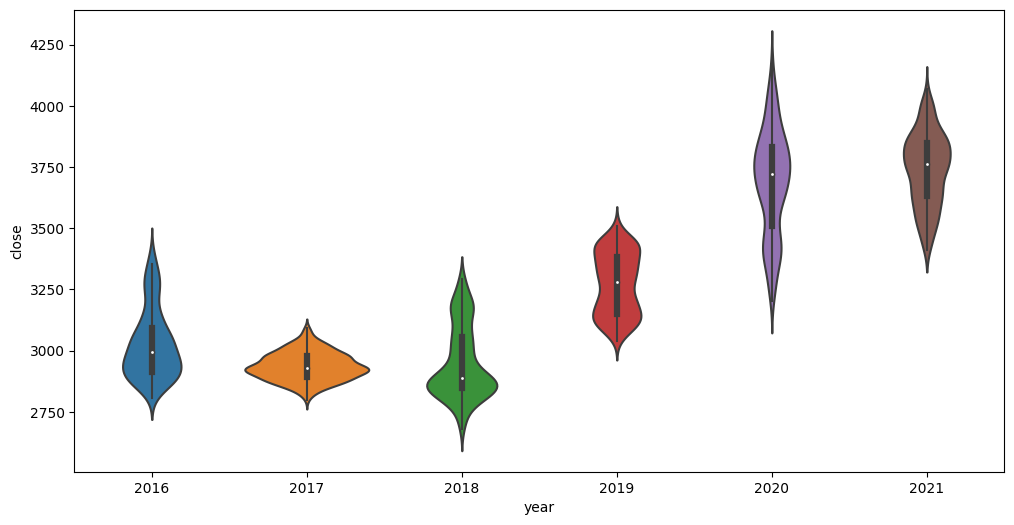

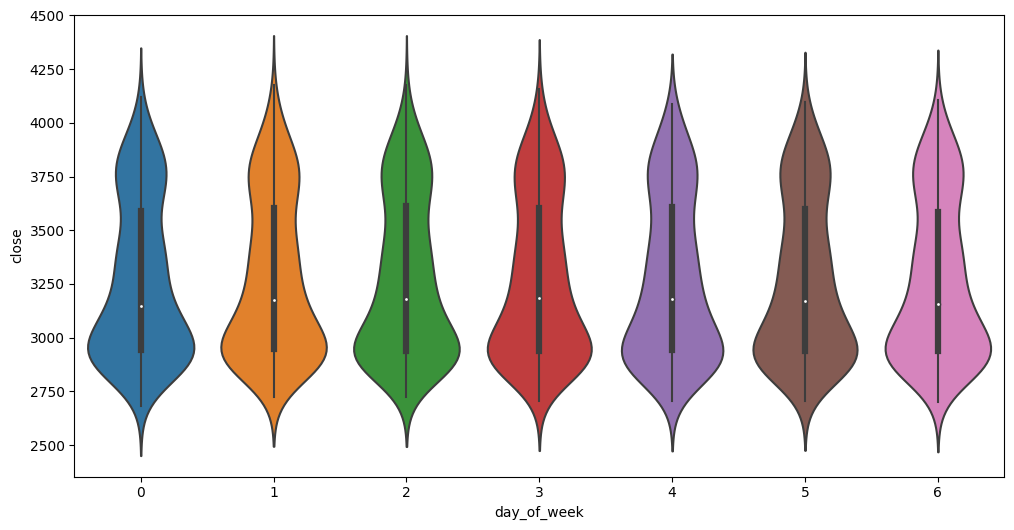

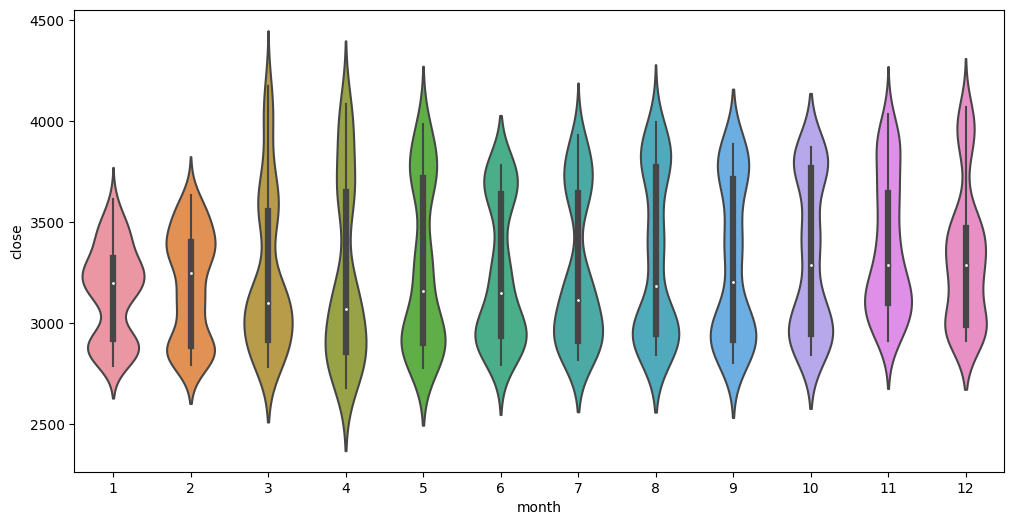

In [40]:
cols = ['year','day_of_week', 'month']

for i in cols:
    plt.figure(figsize=(12,6))
    sns.violinplot( data=data, x=i, y="close", innner = 'box')

### Estadisticas descriptivas

In [41]:
for i in cols:
    gb = data.groupby([i]).agg({'close':['mean','median','var','std']} )
    print(gb)

       close                        
        mean  median      var    std
year                                
2016 3025.59 2993.15 19991.89 141.39
2017 2936.42 2929.84  3248.17  56.99
2018 2948.83 2888.80 21416.49 146.34
2019 3272.69 3279.33 15725.23 125.40
2020 3689.23 3722.27 45882.06 214.20
2021 3739.60 3761.58 22235.09 149.11
              close                         
               mean  median       var    std
day_of_week                                 
0           3263.98 3146.70 132230.33 363.63
1           3274.35 3177.00 133623.87 365.55
2           3272.79 3178.30 133780.36 365.76
3           3271.46 3183.00 133521.98 365.41
4           3268.83 3182.12 135721.12 368.40
5           3265.51 3171.00 133209.17 364.98
6           3264.75 3158.00 132585.53 364.12
        close                         
         mean  median       var    std
month                                 
1     3156.96 3197.72  51107.11 226.07
2     3187.43 3248.50  70780.44 266.05
3     3242.82 3101.68 

In [49]:
mc = MultiComparison(data['close'], data['year'])
mc_results = mc.tukeyhsd()
print(mc_results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
  2016   2017 -89.1671    0.0 -120.0514 -58.2827   True
  2016   2018  -76.764    0.0 -107.6484 -45.8796   True
  2016   2019 247.1045    0.0  216.2201 277.9889   True
  2016   2020 663.6421    0.0  632.7789 694.5054   True
  2016   2021 714.0104    0.0  683.1261 744.8948   True
  2017   2018  12.4031 0.8626  -18.5024  43.3086  False
  2017   2019 336.2716    0.0  305.3661 367.1771   True
  2017   2020 752.8092    0.0  721.9248 783.6935   True
  2017   2021 803.1775    0.0   772.272  834.083   True
  2018   2019 323.8685    0.0   292.963  354.774   True
  2018   2020 740.4061    0.0  709.5217 771.2905   True
  2018   2021 790.7744    0.0  759.8689 821.6799   True
  2019   2020 416.5376    0.0  385.6532  447.422   True
  2019   2021 466.9059    0.0  436.0004 497.8114   True
  2020   2021  50.3683 0.0001   19.4839  81.2527

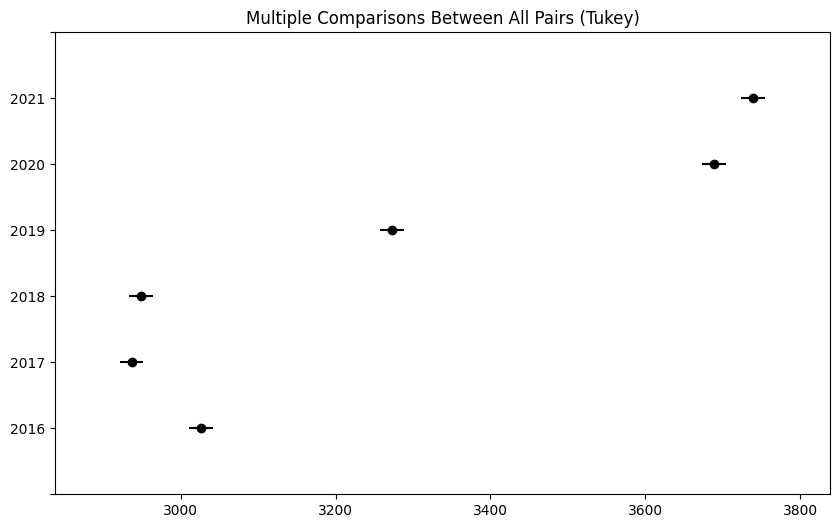

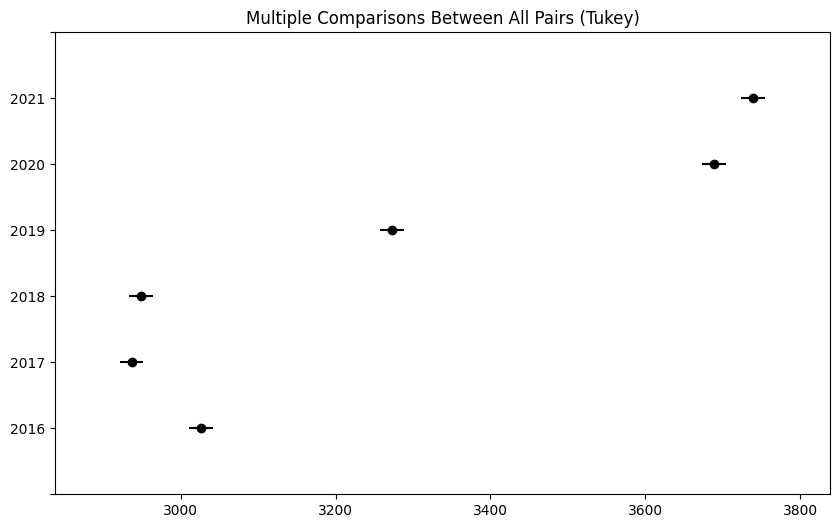

In [50]:
mc_results.plot_simultaneous()

### ACF AND PACF

In [42]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm

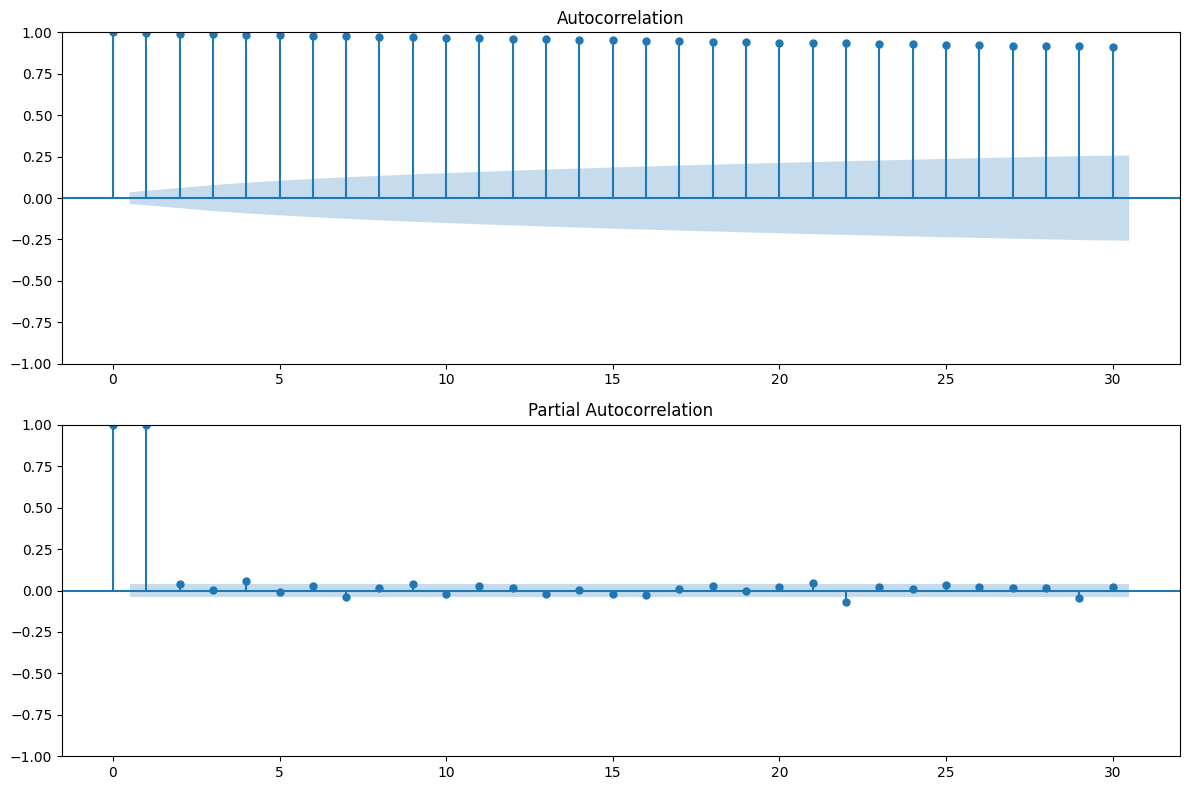

In [43]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

plot_acf(data['close'],lags=30, ax=ax[0], alpha = 0.1)
plot_pacf(data['close'],lags=30, ax=ax[1], method='ols', alpha = 0.05)

#ax[1].annotate('Strong correlation at lag = 1', xy=(1, 0.6),  xycoords='data',
#            xytext=(0.17, 0.75), textcoords='axes fraction',
#            arrowprops=dict(color='red', shrink=0.05, width=1))

plt.tight_layout()
plt.show()

### Box-cox transformation

In [44]:
from scipy.stats import boxcox

In [45]:
data['close_transform'], lam = boxcox(data['close'])

In [46]:
data

,date,close,day_of_week,month,year,close_transform
0,2016-01-01,3137.30,4,1,2016,0.39
1,2016-01-02,3143.13,5,1,2016,0.39
2,2016-01-03,3148.97,6,1,2016,0.39
3,2016-01-04,3154.80,0,1,2016,0.39
4,2016-01-05,3173.90,1,1,2016,0.39
...,...,...,...,...,...,...
2187,2021-12-27,3989.75,0,12,2021,0.39
2188,2021-12-28,3995.08,1,12,2021,0.39
2189,2021-12-29,4007.42,2,12,2021,0.39
2190,2021-12-30,4036.12,3,12,2021,0.39


Text(0, 0.5, 'Transform USD/COP lambda: -2.5395')

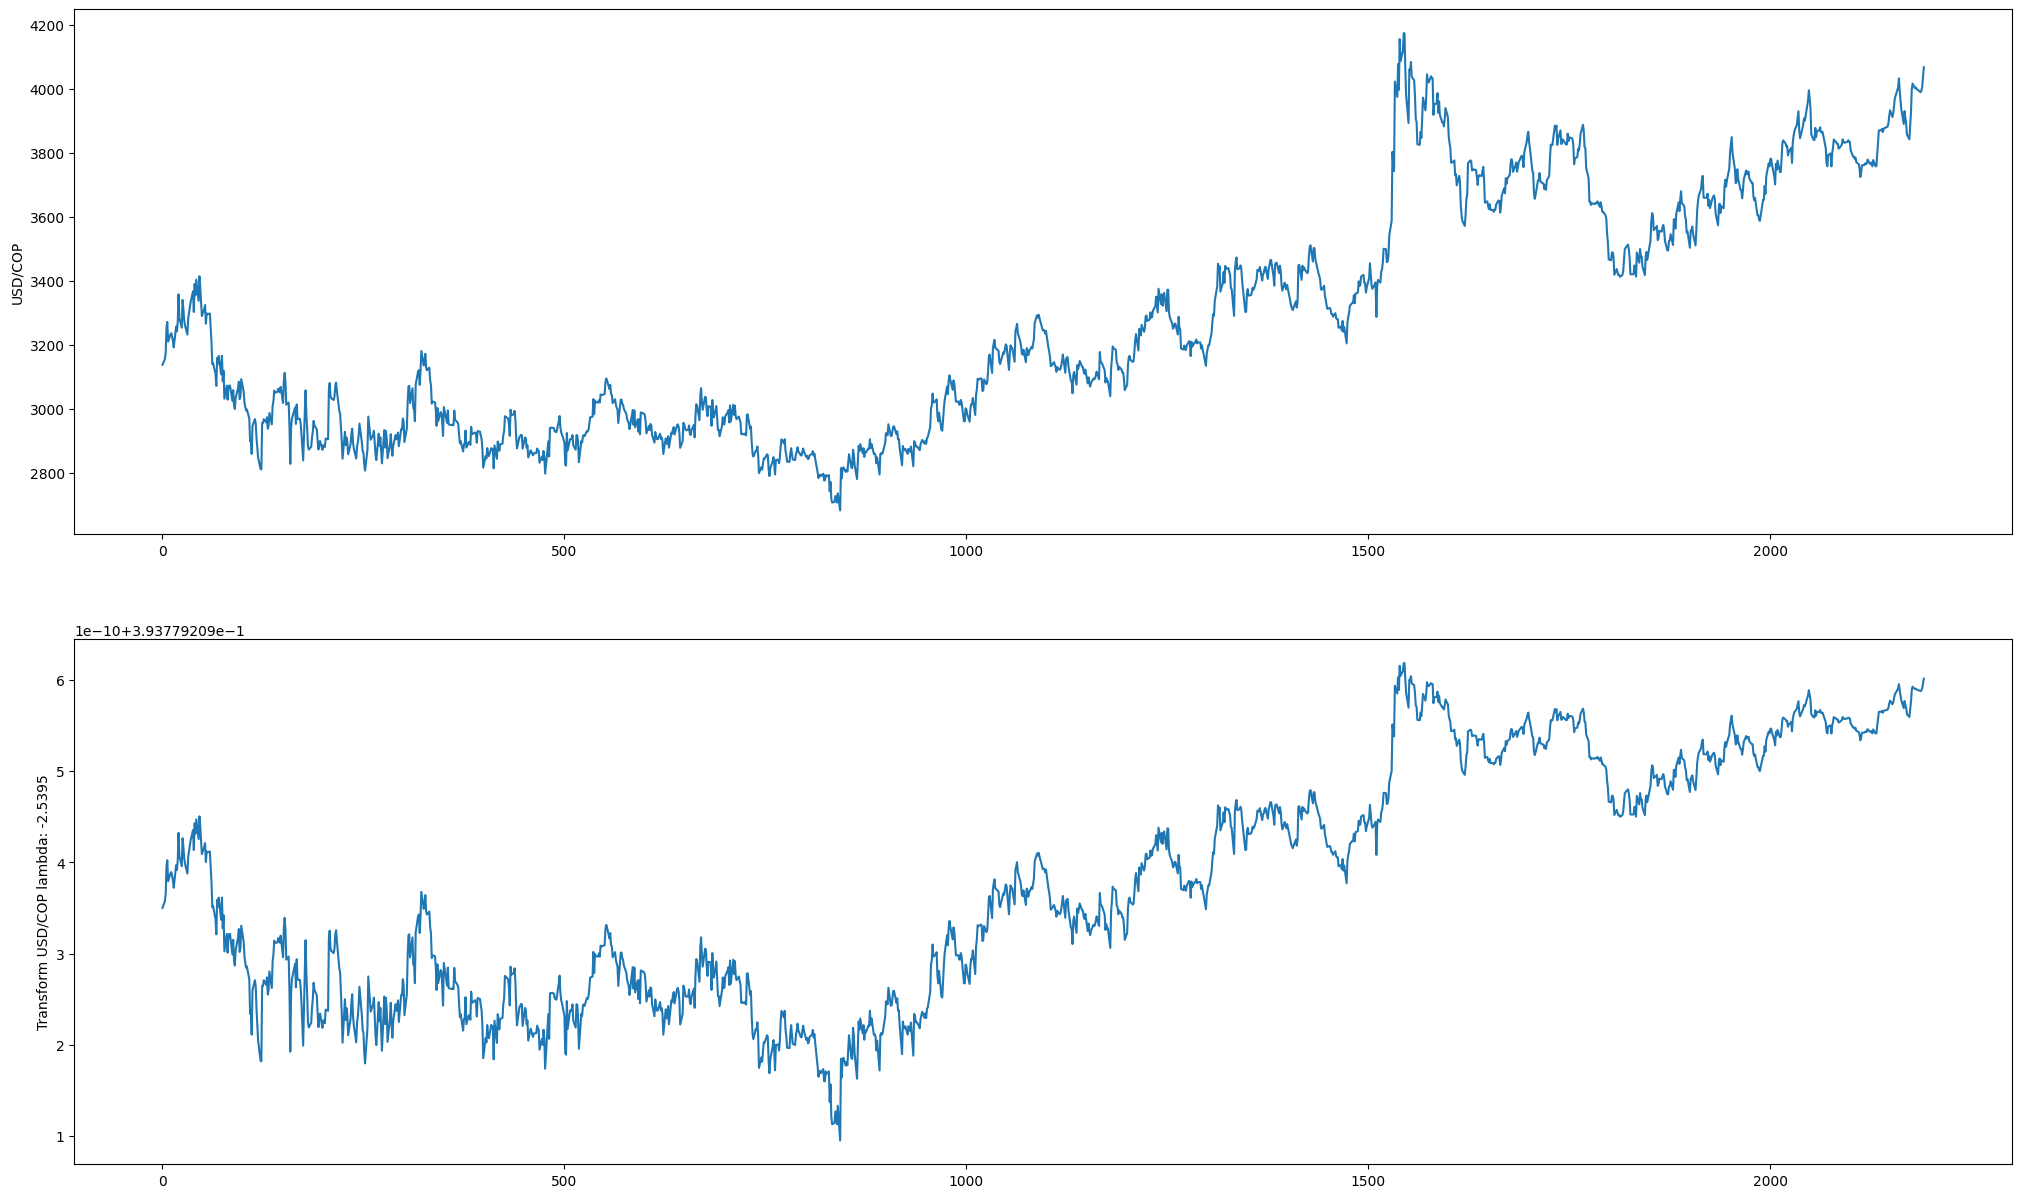

In [47]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (25,15))

ax1.plot(data['close'])
ax1.set_ylabel('USD/COP')


ax2.plot(data['close_transform'])
ax2.set_ylabel('Transform USD/COP' + ' lambda: ' + str(round(lam,4)))